# Lithium Axicon Plasma

In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
from ionization import ionization
from lens import profile
from lens import design
import matplotlib.pyplot as plt
from beam.beams import laserpulse
from beam.beams import laserbeam
from beam.elements import plasma
from beam.elements import optic
from beam import interactions
plt.style.use('notes')
%load_ext autoreload
%autoreload 2

path = '/mnt/md0/Data/rariniello/Lithium_Oven/Lithium_Oven_Axicon/'
lam = 0.796
# All length units are in um

What kind of plasma would be generated in the lithium oven by just shooting an axicon into? At FACET a 2in axicon was used with a 40mm FWHM super Gaussian flattop beam. Axicons were used with 177 and 178 included angle.

In [2]:
# Create a laser beam, pulse and axicon lens
Nx = 2**13
X = 60e3
tau = 80
pulseParams = {'Nx' : Nx,
               'Ny' : Nx,
               'Nt' : 2**6,
               'X' : X,
               'Y' : X,
               'T' : 3*tau,
               'lam' : lam,
               'path' : path,
               'name' : 'FlattopBeam',
               'threads' : 20,
               'cyl' : True,
               'tau' : tau,
               'load' : False}

beam = laserbeam.Laser(pulseParams)

alpha = 1.0
n = 1.458
beta = np.degrees(np.arcsin(n*np.sin(np.radians(alpha)))) - alpha
print('Axicon deflection angle : %0.3f deg' % beta)
lensParams = {'Nx' : Nx,
              'Ny' : Nx,
              'X' : X,
              'Y' : X,
              'path' : path,
              'name' : 'Axicon',
              'lam' : lam,
              'beta' : beta,
              'load' : False}
axicon = optic.AxiconLens(lensParams)

apertureParams = {'Nx' : pulseParams['Nx'],
                  'Ny' : pulseParams['Ny'],
                  'X' : pulseParams['X'],
                  'Y' : pulseParams['Y'],
                  'path' : path,
                  'name' : 'Aperturen',
                  'lam' : lam,
                  'r' : 50.8e3/2,
                  'load' : False}

aperture = optic.Aperture(apertureParams)

Axicon deflection angle : 0.458 deg


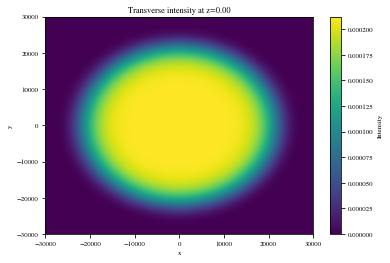

Power: 0.292883866084


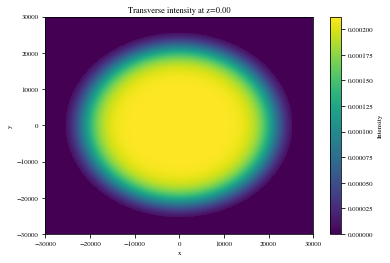

In [3]:
# Create a super gaussian intensity profile and pass it through a lens.
w0 = 24e3
E0 = 0.4
n = 8
x2 = np.reshape(beam.x, (beam.Nx, 1))**2
y2 = np.reshape(beam.y, (1, beam.Ny))**2
r = np.sqrt(x2 + y2)
e = E0 * np.exp(-(r/w0)**n)

beam.initialize_field(e)
beam.plot_current_intensity()
print('Power:', beam.total_cyl_power(beam.x[int(beam.Nx/2):],
                                         beam.intensity_from_field(beam.e[int(beam.Nx/2):, int(beam.Ny/2)])))
interactions.beam_phase(beam, axicon)
interactions.beam_intensity(beam, aperture)
beam.plot_current_intensity()
r = beam.x[int(Nx/2):]
E = beam.e[int(Nx/2):, int(Nx/2)]
del beam

In [4]:
# Create the gas density the laser is going into
ne0 = 3.4e16/1e17
z = np.linspace(0, 2.5e6, 10000)
sim_start = 30e4
sim_start, n_plot, n = profile.lithium_oven_profile(z, 40e4+sim_start, ne0)
sim_length = 80e4
np.save(path+'sim_size.npy', [sim_start, sim_length])

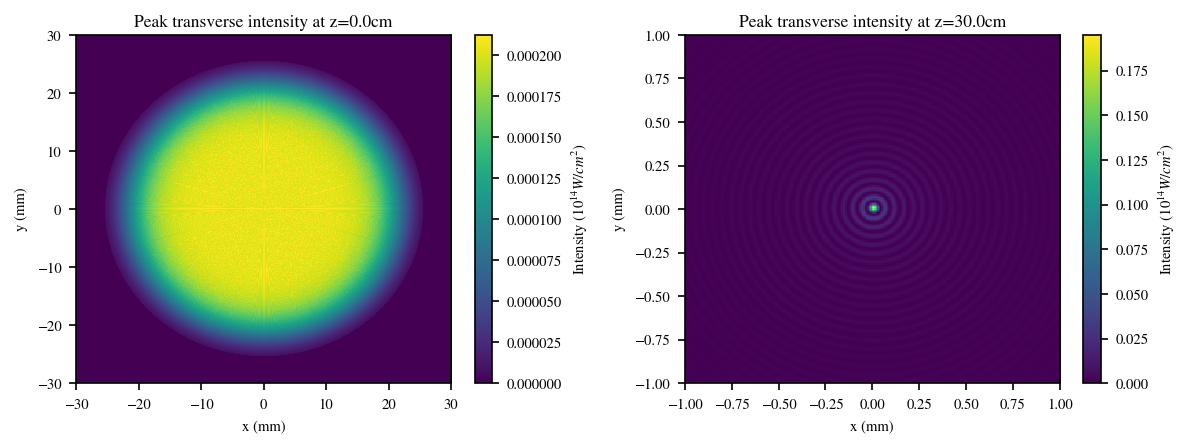

In [5]:
X = 60e3
Nx = 2**13
sim_start = 30e4
beam0, pulseParams = design.propagate_to_start(r, E, sim_start, X, Nx, path, lam, tau, 20, [-1, 1])

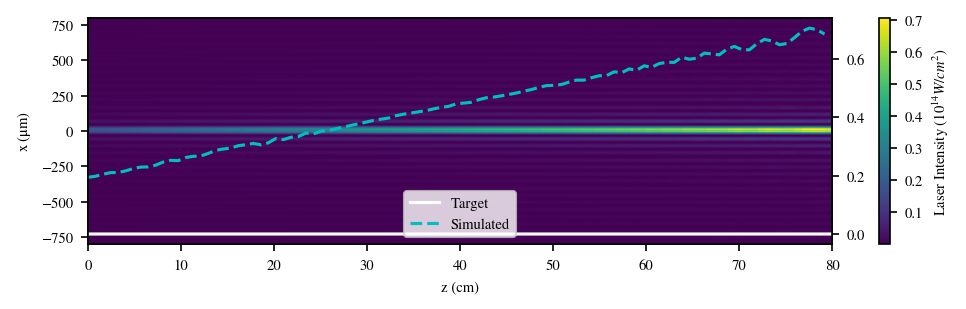

In [6]:
Nx = 2**11
Nz = 100
X = 15e3
design.domain_test(X, Nx, sim_length, Nz, beam0, pulseParams, z, np.zeros(len(z)), sim_start, [-800, 800]);

Initial pulse energy 5.88mJ
Final pulse energy 5.73mJ


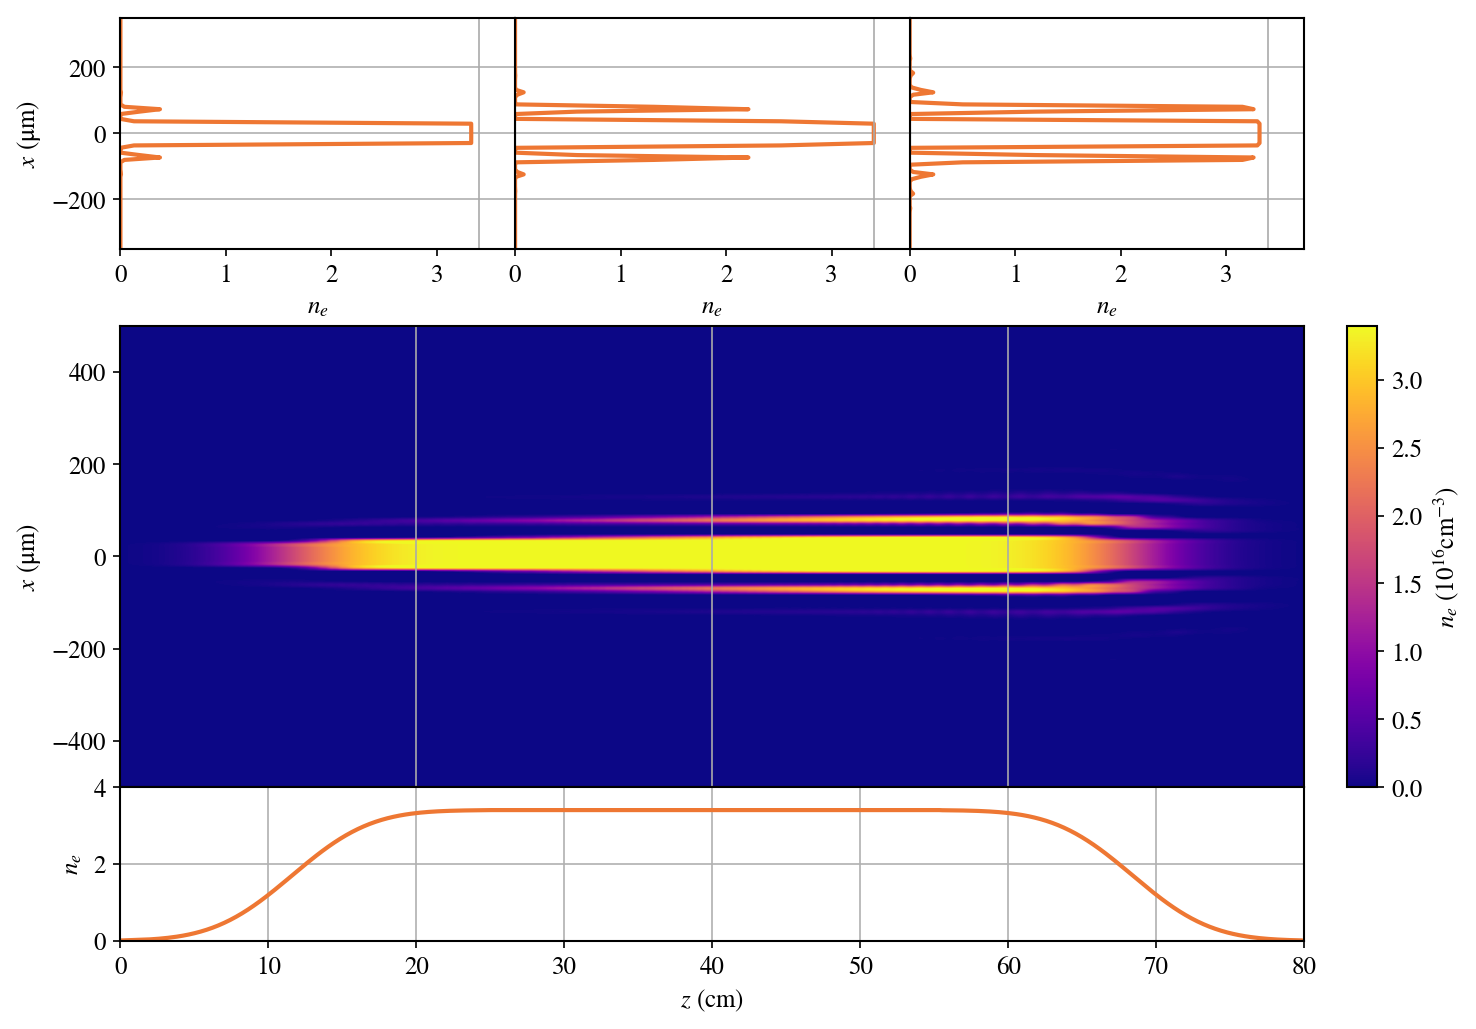

In [7]:
Nx = 2**11
Nz = 400
ext = [0, sim_length/1e4, -X/2, X/2]
plt.style.use('presentation')
pulse, I, ne = design.plasma_refraction(X, Nx, sim_length, Nz, beam0, pulseParams, ionization.Li, n, 
                                        sim_start, 1, ne0)
design.plot_plasma_density(pulse, ne, ne0, ext, lines=[20, 40, 60])

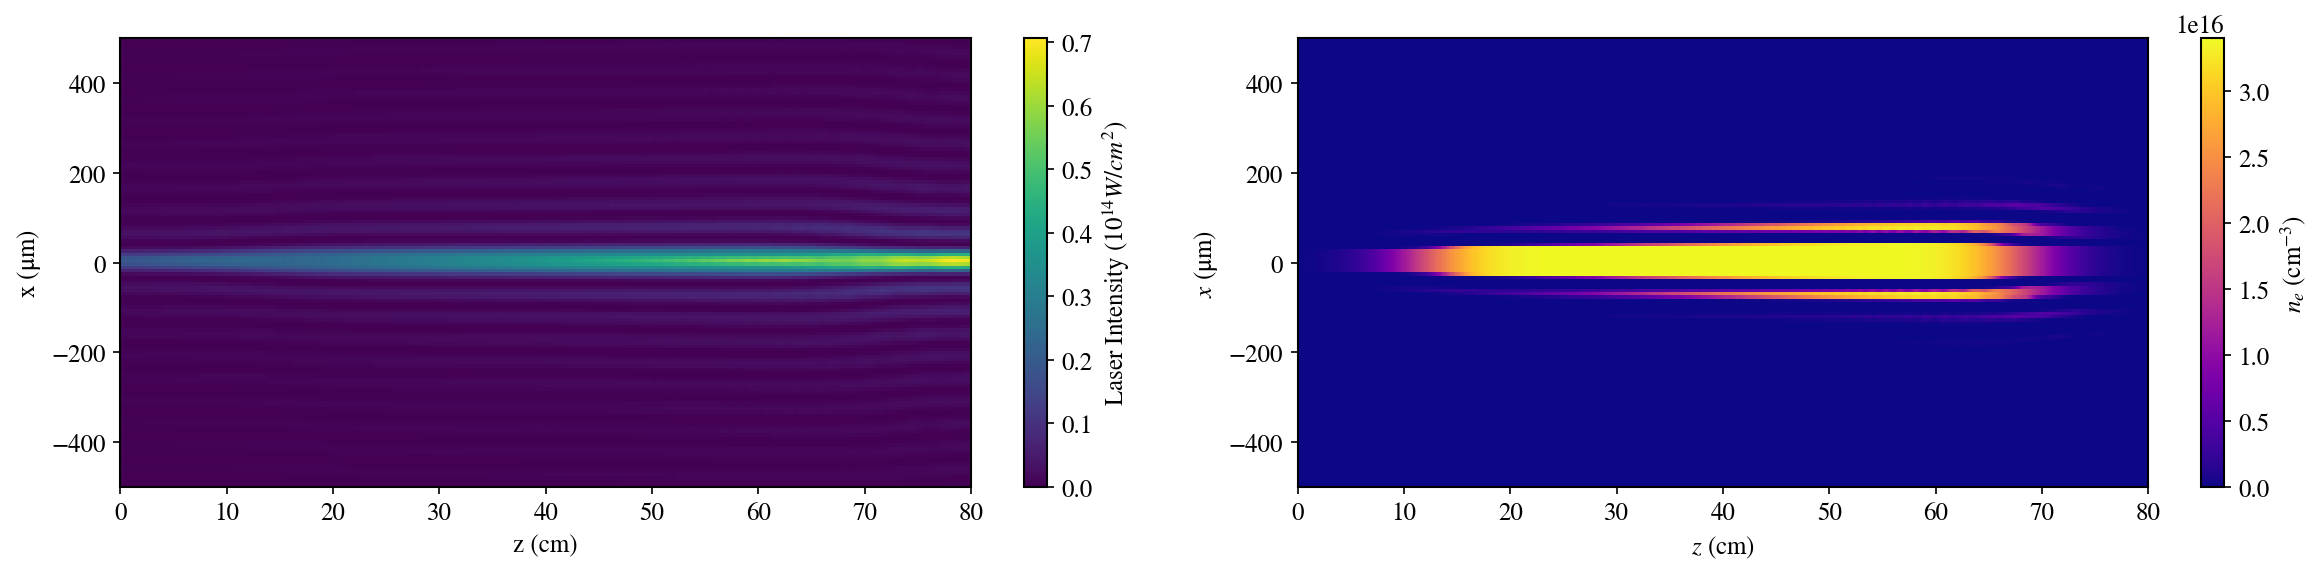

In [8]:
design.plot_laser_plasma(I, ne, ext)

In [9]:
# Create a laser beam, pulse and axicon lens
Nx = 2**13
X = 60e3
tau = 80
pulseParams = {'Nx' : Nx,
               'Ny' : Nx,
               'Nt' : 2**6,
               'X' : X,
               'Y' : X,
               'T' : 3*tau,
               'lam' : lam,
               'path' : path,
               'name' : 'FlattopBeam',
               'threads' : 20,
               'cyl' : True,
               'tau' : tau,
               'load' : False}

beam = laserbeam.Laser(pulseParams)

alpha = 1.5
n = 1.458
beta = np.degrees(np.arcsin(n*np.sin(np.radians(alpha)))) - alpha
print('Axicon deflection angle : %0.3f deg' % beta)
lensParams = {'Nx' : Nx,
              'Ny' : Nx,
              'X' : X,
              'Y' : X,
              'path' : path,
              'name' : 'Axicon',
              'lam' : lam,
              'beta' : beta,
              'load' : False}
axicon = optic.AxiconLens(lensParams)

apertureParams = {'Nx' : pulseParams['Nx'],
                  'Ny' : pulseParams['Ny'],
                  'X' : pulseParams['X'],
                  'Y' : pulseParams['Y'],
                  'path' : path,
                  'name' : 'Aperturen',
                  'lam' : lam,
                  'r' : 50.8e3/2,
                  'load' : False}

aperture = optic.Aperture(apertureParams)

Axicon deflection angle : 0.687 deg


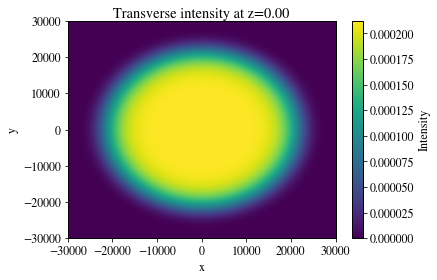

Power: 0.292883866084


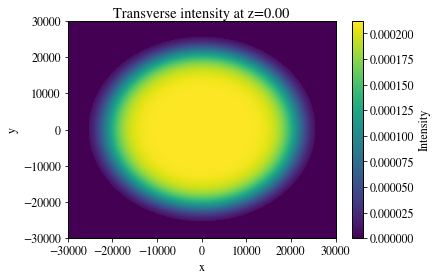

In [10]:
# Create a super gaussian intensity profile and pass it through a lens.
w0 = 24e3
E0 = 0.4
n = 8
x2 = np.reshape(beam.x, (beam.Nx, 1))**2
y2 = np.reshape(beam.y, (1, beam.Ny))**2
r = np.sqrt(x2 + y2)
e = E0 * np.exp(-(r/w0)**n)

beam.initialize_field(e)
beam.plot_current_intensity()
print('Power:', beam.total_cyl_power(beam.x[int(beam.Nx/2):],
                                         beam.intensity_from_field(beam.e[int(beam.Nx/2):, int(beam.Ny/2)])))
interactions.beam_phase(beam, axicon)
interactions.beam_intensity(beam, aperture)
beam.plot_current_intensity()
r = beam.x[int(Nx/2):]
E = beam.e[int(Nx/2):, int(Nx/2)]
del beam

In [24]:
# Create the gas density the laser is going into
ne0 = 3.4e16/1e17
z = np.linspace(0, 2.5e6, 10000)
sim_start = 30e4
sim_start, n_plot, n = profile.lithium_oven_profile(z, 40e4+sim_start, ne0)
sim_length = 80e4
np.save(path+'sim_size.npy', [sim_start, sim_length])

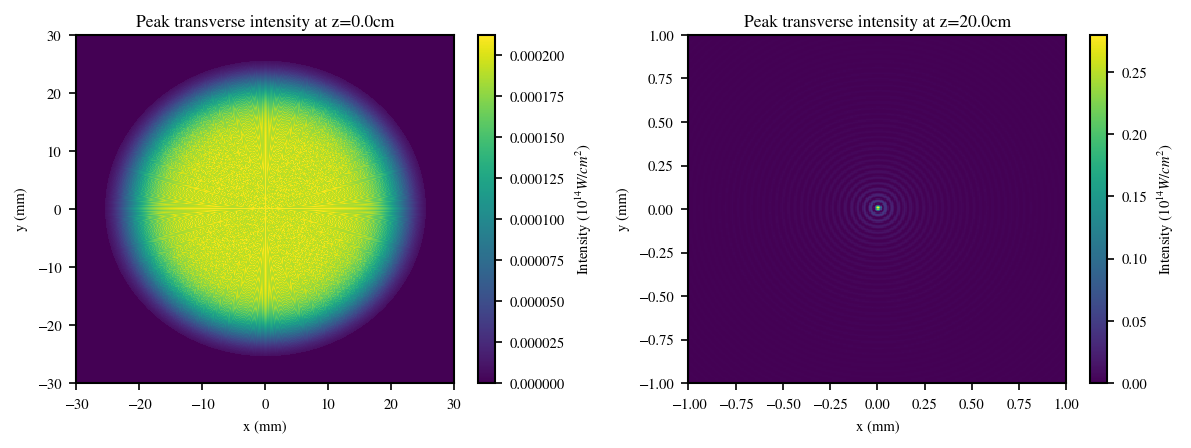

In [25]:
X = 60e3
Nx = 2**13
sim_start = 20e4
plt.style.use('notes')
beam0, pulseParams = design.propagate_to_start(r, E, sim_start, X, Nx, path, lam, tau, 20, [-1, 1])

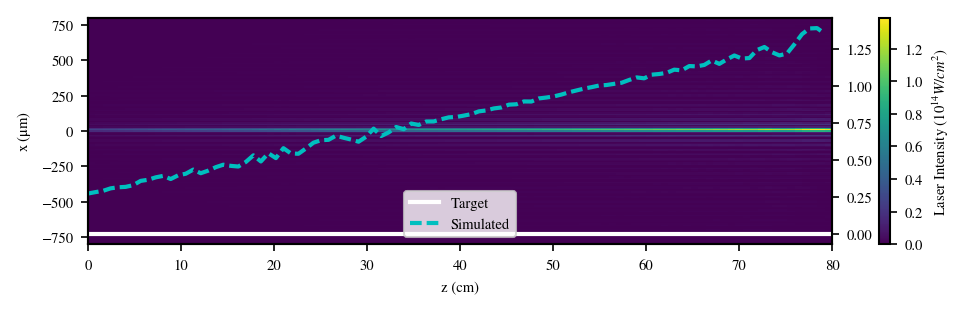

In [ ]:
Nx = 2**11
Nz = 100
X = 20e3
design.domain_test(X, Nx, sim_length, Nz, beam0, pulseParams, z, np.zeros(len(z)), sim_start, [-800, 800]);

In [ ]:
Nx = 2**11
Nz = 400
ext = [0, sim_length/1e4, -X/2, X/2]
plt.style.use('presentation')
pulse, I, ne = design.plasma_refraction(X, Nx, sim_length, Nz, beam0, pulseParams, ionization.Li, n, 
                                        sim_start, 1, ne0)
design.plot_plasma_density(pulse, ne, ne0, ext, lines=[20, 40, 60])

Initial pulse energy 8.61mJ
